# 一、	股票之基本分析探討

## 1.2	視覺化圖表的製作與分析探討（K線部分）

以視覺化圖表綜觀台股市場整體之走勢與價位，並分析說明。包含台股指數、類股基本趨勢、投資人的投資模式與籌碼分配等等之資訊。

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mpf ### 這個要先安裝！！（pip install mpl_finance）
import seaborn as sns
import datetime as datetime
import warnings

### 去除煩人的 warrning
warnings.filterwarnings('ignore')

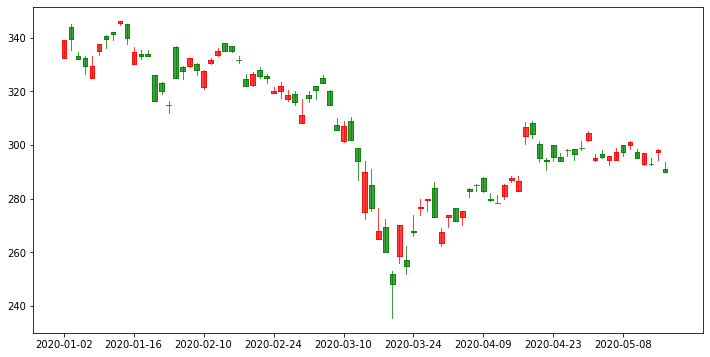

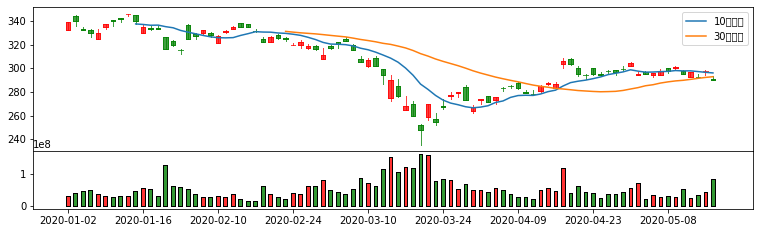

In [8]:
#talib

start = datetime.datetime(2020,1,1)
df_1101 = pdr.DataReader('2330.TW', 'yahoo', start=start)

df_1101.index = df_1101.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_1101.index), 10))
ax.set_xticklabels(df_1101.index[::10])
mpf.candlestick2_ochl(ax, df_1101['Open'], df_1101['Close'], df_1101['High'],
                      df_1101['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);
import talib
sma_10 = talib.SMA(np.array(df_1101['Close']), 10)
sma_30 = talib.SMA(np.array(df_1101['Close']), 30)

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_1101.index), 10))
ax.set_xticklabels(df_1101.index[::10])
mpf.candlestick2_ochl(ax, df_1101['Open'], df_1101['Close'], df_1101['High'],
                      df_1101['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_1101['Open'], df_1101['Close'], df_1101['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_1101.index), 10))
ax2.set_xticklabels(df_1101.index[::10])

ax.legend();